In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
data_path = './data/players_20.csv'
df = pd.read_csv(data_path)
df.fillna(0, inplace = True)
df = df.drop(['player_url','dob','real_face','player_tags','long_name','sofifa_id','skill_moves'], axis = 1)
for col in df.columns:
    print(col)

short_name
age
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
work_rate
body_type
release_clause_eur
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defending_marking
defending_standing_tackle
defending_sliding_tackle
goal

In [27]:
#CLUB VALUES

In [5]:
#getting the 20 top valued clubs

clubs = df['club'].unique()
club_names = []
club_values = np.zeros((clubs.shape[0],1))

for i, club in enumerate(clubs):
    rows_with_club = df.loc[df['club'] == club]
    
    #club value as sum of market values of players
    mkt_values = rows_with_club['value_eur']
    club_names.append(club)
    
    club_values[i] = pd.Series.sum(mkt_values)

In [6]:
# print(club_values)
sort_val_idxs = np.argsort(club_values, axis = 0)
sort_val_idxs = np.flip(np.squeeze(sort_val_idxs))

club_values = club_values[sort_val_idxs]
club_names[:] = [club_names[i] for i in sort_val_idxs] 

# for i in range(len(club_names)):
#     print(club_names[i],club_values[i])

[897850000.0, 869300000.0, 845745000.0, 735475000.0, 693265000.0, 688775000.0, 687550000.0, 649850000.0, 590375000.0, 532325000.0, 518275000.0, 504970000.0, 501675000.0, 454860000.0, 448610000.0, 406355000.0, 384745000.0, 384060000.0, 382760000.0, 359400000.0]


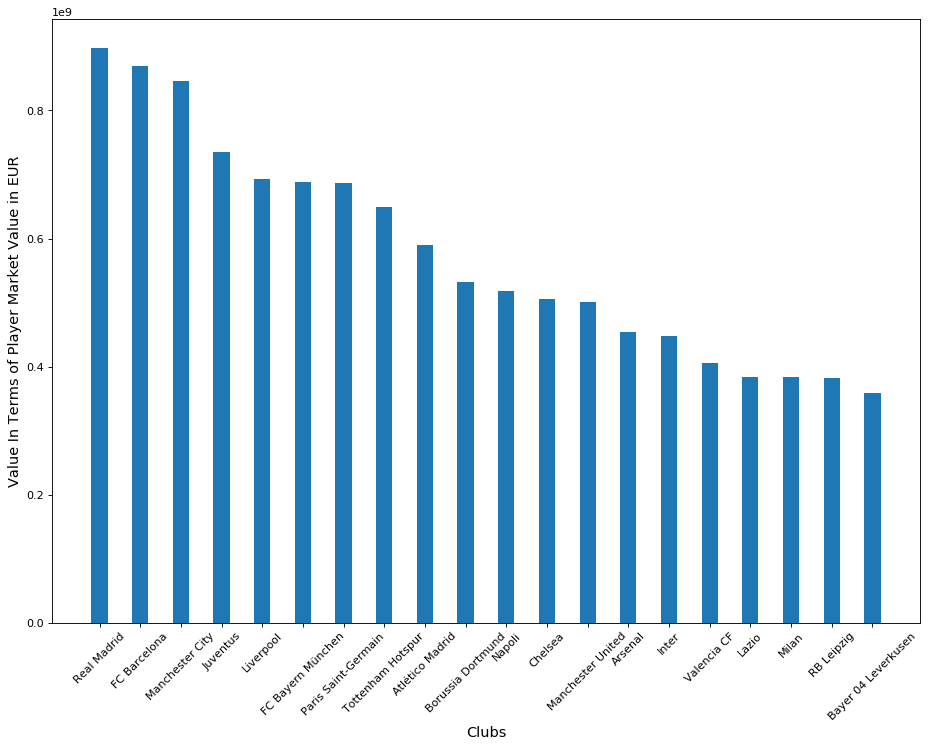

In [113]:
top_50_club_val = club_values[:20,0]
top_50_club_val_names = club_names[:20]

#generate plot
print(list(top_50_club_val))
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Clubs', fontsize = 13)
plt.ylabel('Value In Terms of Player Market Value in EUR',fontsize = 13)
plt.bar(range(20),height = list(top_50_club_val),width= 0.4,align='center')
plt.xticks(range(20), top_50_club_val_names, rotation = 45)
# plt.set_xticklabels(top_50_club_val_names, rotation=45 )
plt.savefig('foo.png', bbox_inches='tight')

In [8]:
#TODO : CLUB VALUES WITH PLAYER VALUES STACKED ON TOP OF EACH OTHER

In [9]:
df['club'].value_counts()['Chelsea']

33

In [17]:
#market value per position

positions = df['team_position'].unique()
print(positions)

print(len(df))
dfposmval = df[df['team_position'] != 0]
dfposmval = dfposmval[dfposmval['team_position'] != 'RES']
dfposmval = dfposmval[dfposmval['team_position'] != 'SUB']
print(len(dfposmval))

positions = dfposmval['team_position'].unique()
print(positions)




# wingback
# cb
# mid
# gk
# forward

['RW' 'LW' 'CAM' 'GK' 'RCM' 'LCB' 'ST' 'CDM' 'LDM' 'RM' 'RCB' 'LCM' 'LM'
 'CF' 'SUB' 'LB' 'LS' 'RB' 'RDM' 'RES' 'RAM' 'RS' 'RF' 'CM' 'CB' 'LF'
 'LAM' 0 'RWB' 'LWB']
18278
7260
['RW' 'LW' 'CAM' 'GK' 'RCM' 'LCB' 'ST' 'CDM' 'LDM' 'RM' 'RCB' 'LCM' 'LM'
 'CF' 'LB' 'LS' 'RB' 'RDM' 'RAM' 'RS' 'RF' 'CM' 'CB' 'LF' 'LAM' 'RWB'
 'LWB']


In [142]:
# team_position


# 'RW' 'LW' 'RS' 'RF' 'CF' 'ST' 'LF'  : FORWARD
# 'CDM' 'LDM' 'RDM' 'LCM' 'CM' 'RCM': DEFENSIVE MID
# 'RAM' 'RM' 'LM' 'CAM' 'LAM' : ATTACKING MID
# 'RWB' 'LWB' 'LB' 'RB' : WING BACK
# 'CB' 'LCB' 'RCB' : CENTRE BACK
# 'GK' : GOALKEEPER

#confidence interval statsmodel regression to give importance per feature

clf_features = ['pace',
'shooting',
'passing',
'dribbling',
'defending',
'physic',
'gk_diving',
'gk_handling',
'gk_kicking',
'gk_reflexes',
'gk_speed',
'gk_positioning',
'attacking_crossing',
'attacking_finishing',
'attacking_heading_accuracy',
'attacking_short_passing',
'attacking_volleys',
'skill_dribbling',
'skill_curve',
'skill_fk_accuracy',
'skill_long_passing',
'skill_ball_control',
'movement_acceleration',
'movement_sprint_speed',
'movement_agility',
'movement_reactions',
'movement_balance',
'power_shot_power',
'power_jumping',
'power_stamina',
'power_strength',
'power_long_shots',
'mentality_aggression',
'mentality_interceptions',
'mentality_positioning',
'mentality_vision',
'mentality_penalties',
'mentality_composure',
'defending_marking',
'defending_standing_tackle',
'defending_sliding_tackle',
'goalkeeping_diving',
'goalkeeping_handling',
'goalkeeping_kicking',
'goalkeeping_positioning'
,'goalkeeping_reflexes'
,'weak_foot']

targets = ['player_positions']

df_clf = df[clf_features]
df_clf.head()

df_targets = df[targets]
df_targets.head()

y_categ = []

genzn = dict()
genzn['WG'] = ['RW', 'LW','RM', 'LM']
genzn['FW'] = ['LS', 'RS', 'RF', 'CF', 'ST', 'LF']
genzn['WB'] = ['RWB', 'LWB', 'LB', 'RB']
genzn['CB'] = ['CB', 'LCB', 'RCB']
genzn['GK'] = ['GK']
genzn['AM'] = ['RAM', 'CAM', 'LAM']
genzn['DM'] = ['CDM', 'LDM', 'RDM', 'LCM', 'CM', 'RCM']

idx = dict()
idx['FW'] = 0
idx['WB'] = 1
idx['CB'] = 2
idx['GK'] = 3
idx['AM'] = 4
idx['DM'] = 5
idx['WG'] = 6
for i in range(len(df_targets)):
     for k, v in genzn.items():
        if df_targets['player_positions'][i].split(',')[0] in v:
            y_categ.append(idx[k]) 

print(len(y_categ))

y_one_hot = np.zeros((len(y_categ),len(idx)))
for i in range(len(y_categ)):
    y_one_hot[i,y_categ[i]] = 1


# print(y_one_hot[:10])

18278


In [143]:
X_train = df_clf.values
print(X_train[0])


[87. 92. 92. 96. 39. 66.  0.  0.  0.  0.  0.  0. 88. 95. 70. 92. 88. 97.
 93. 94. 92. 96. 91. 84. 93. 95. 95. 86. 68. 75. 68. 94. 48. 40. 94. 94.
 75. 96. 33. 37. 26.  6. 11. 15. 14.  8.  4.]


In [144]:
def normalize(X):
    # 0 mean
    X_mean = np.sum(X, axis = 0) / X.shape[0]
    X_sub_mean = X - X_mean
    
    X_range = np.max(X, axis = 0) - np.min(X, axis = 0)
    
    return X_sub_mean / X_range

    # unit sd
    

In [132]:
X_train_norm = normalize(X_train)
#features normalized

In [145]:
X_train_norm.shape
y_categ = np.array(y_categ)
print(y_categ.shape)
np.max(y_categ)

(18278,)


6

In [146]:
from sklearn.linear_model import LogisticRegression

In [147]:
log_reg = LogisticRegression(max_iter = 10000, C=40)

log_reg.fit(X_train_norm, y_categ)


LogisticRegression(C=40, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [148]:
print(X_train_norm[0].shape)
log_reg.predict(X_train_norm[:5])

log_reg.score(X_train_norm, y_categ)

(47,)


0.8645366013787067

In [149]:
print(log_reg.decision_function(X_train_norm[:2]))

[[ 12.09028622  -9.72913129 -19.9114985  -12.24339264  13.00525978
    4.72050109  12.06797535]
 [ 16.51770968 -10.06875859 -17.34490941 -11.81277445   9.89480262
    0.16789729  12.64603286]]


(7, 47)


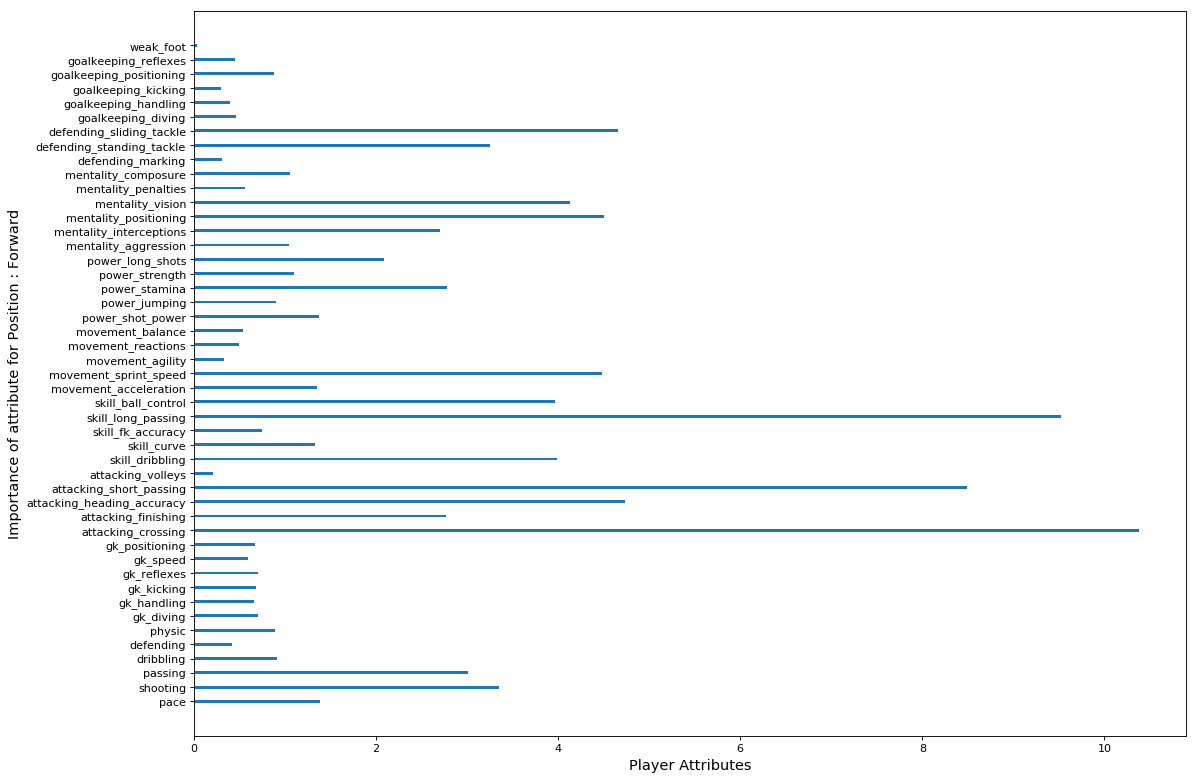

In [154]:
print(np.shape(log_reg.coef_))

#generate plot
plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Player Attributes', fontsize = 13)
plt.ylabel('Importance of attribute for Position : Forward',fontsize = 13)
# plt.bar(range(47),height = list(np.abs(log_reg.coef_[1,:])),width= 0.2,align='center')
# plt.xticks(range(47), clf_features, rotation = 90)

plt.barh(range(47),width = list(np.abs(log_reg.coef_[5,:])),height= 0.2,align='center')
plt.yticks(range(47), clf_features, rotation = 0)

# plt.set_xticklabels(top_50_club_val_names, rotation=45 )
plt.savefig('fwd_weights.png', bbox_inches='tight')

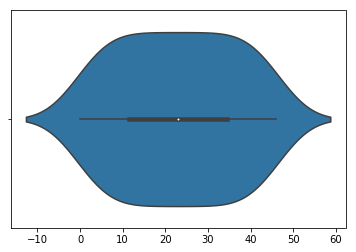

In [122]:
import seaborn
seaborn.violinplot(np.array(range(47)))